# Self-Driving Car Engineer Nanodegree
## Project : Vehicle detection

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  #scikit-learn >= 0.18
#from sklearn.cross_validation import train_test_split #scikit-learn <= 0.17

import time

import pickle
from utility import *

%matplotlib inline

## Train model
### 1. Load data

In [2]:
car_image_files = glob.glob('vehicles/**/*.png', recursive = True)
notcar_image_files = glob.glob('non-vehicles/**/*.png', recursive = True)
cars = []
notcars = []

for image_file in car_image_files:
    cars.append (image_file)
for image_file in notcar_image_files:
    notcars.append (image_file)

len_cars = len(cars)
len_notcars = len(notcars)
print('Car samples size :', len_cars)
print('Not Car smaples size :', len_notcars)

Car samples size : 8792
Not Car smaples size : 8968


### 2. Explore data

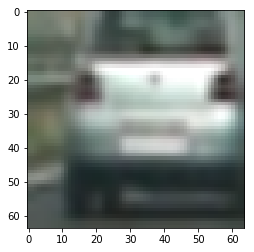

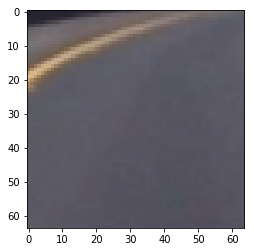

In [3]:
show_image (cv2.imread(cars[100]))
show_image (cv2.imread(notcars[100]))

### 3. Test functions (hog)

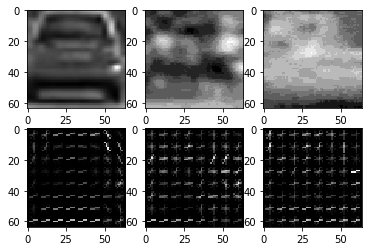

In [4]:
ind = np.random.randint(0,len_cars-1)
ind = 10

image = cv2.imread(cars[ind])
image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
imageY = image[:,:,0]
imageCr = image[:,:,1]
imageCb = image[:,:,2]

orient = 9
pix_per_cell = 8
cell_per_block = 2

featuresY, hog_imageY = get_hog_features (imageY, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
featuresCr, hog_imageCr = get_hog_features (imageCr, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
featuresCb, hog_imageCb = get_hog_features (imageCb, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

fig = plt.figure()
plt.subplot(231)
plt.imshow(imageY, cmap = 'gray')
plt.subplot(232)
plt.imshow(imageCr, cmap = 'gray')
plt.subplot(233)
plt.imshow(imageCb, cmap = 'gray')
plt.subplot(234)
plt.imshow(hog_imageY, cmap = 'gray')
plt.subplot(235)
plt.imshow(hog_imageCr, cmap = 'gray')
plt.subplot(236)
plt.imshow(hog_imageCb, cmap = 'gray')

### 4. Parameter setting

In [5]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9    # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

### 5.  Extract features

In [6]:
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

print("Car feature samples : ", len(car_features))
print("Notcar feature samples : ", len(notcar_features))

X = np.vstack((car_features, notcar_features)).astype(np.float64) 

Car feature samples :  8792
Notcar feature samples :  8968


### 6. Comine and normalize features

In [7]:
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

### 7. Split data into training set and test set

In [8]:
# Split up data into randomized training and test sets
#rand_state = np.random.randint(0, 100)
rand_state = 10
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


### 8. Train model and test performance

In [9]:
svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

60.92 Seconds to train SVC...
Test Accuracy of SVC =  0.9879


### 9. Save model

In [10]:
data={
    'svc': svc,
    'X_scaler': X_scaler,
    'color_space': color_space,
    'orient': orient,
    'pix_per_cell': pix_per_cell,
    'cell_per_block': cell_per_block,
    'hog_channel': hog_channel,    
    'spatial_size' : spatial_size,
    'hist_bins': hist_bins
     }

with open('model.p', 'wb') as pFile:
    pickle.dump(data, pFile)

### 10. Model test

In [11]:
import pickle
from utility import *

## Load model parameters
with open('model.p', 'rb') as pFile:
    data = pickle.load(pFile)
    for key in data:
        exec(key + "= data['" + str(key) + "']")

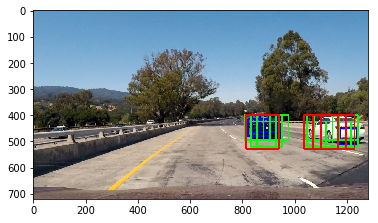

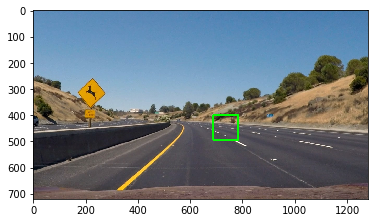

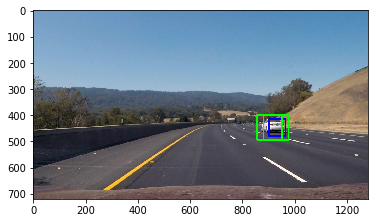

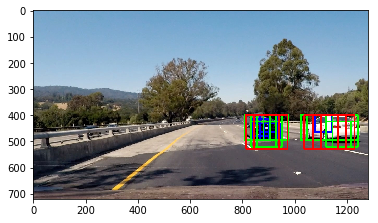

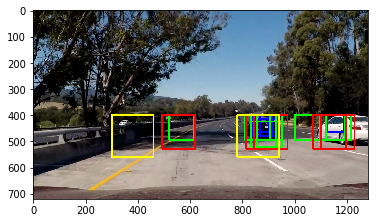

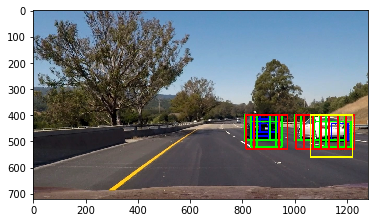

In [12]:
import glob

for image_p in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image_p) 
    draw_img = np.copy(img)
    ystart_ystop_xstart_xstop_scale_color = [(400, 650 , 500, 1300, 1.0, (0,0,255) ),
                                             (400, 650 , 400, 1300, 1.5, (0,255,0) ),
                                             (400, 650 , 300, 1300, 2.0, (255,0,0) ),
                                             (400, 650 , 300, 1300, 2.5, (255,255,0) )
#                                             (400, 650 , 300, 1300, 2.0, (255,0,255) ),
#                                             (400, 650 , 300, 1300, 2.0, (0,255,255) )
                                            ]

    cars_boxes_single =[]    
    cars_boxes =[]    
    for (ystart, ystop, xstart, xstop, scale, color) in ystart_ystop_xstart_xstop_scale_color:
        cars_boxes_single = find_cars_boxes(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins)      
        cars_boxes += cars_boxes_single
        draw_img = draw_boxes(draw_img,cars_boxes_single,color=color)          
    
    show_image(cv2.cvtColor(draw_img, cv2.COLOR_RGB2BGR))